## DA311 Machine Learning Lab 
## Assignment 6

### TASK-A

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [144]:
def initialize_parameters(data, n_clusters, means=None):
    # Initialize means randomly from the data
    if means is None:
        random_indices = np.random.choice(len(data), n_clusters, replace=False)
        means = data[random_indices]
    
    # Initialize covariances as identity matrices
    covariances = [np.identity(data.shape[1]) for _ in range(n_clusters)]
    
    # Initialize mixing coefficients uniformly
    mixing_coefficients = [1.0 / n_clusters] * n_clusters
    
    return means, covariances, mixing_coefficients

def expectation_step(data, means, covariances, mixing_coeffs):
    n_clusters = len(means)
    responsibilities = np.zeros((len(data), n_clusters))
    
    for k in range(n_clusters):
        # Calculate the probability density for each data point in cluster k
        pdf = multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
        responsibilities[:, k] = mixing_coeffs[k] * pdf
    
    # Normalize responsibilities
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
    return responsibilities

def maximization_step(data, responsibilities):
    n_clusters = responsibilities.shape[1]
    N_k = responsibilities.sum(axis=0)
    
    # Update means
    means = np.dot(responsibilities.T, data) / N_k[:, np.newaxis]
    
    # Update covariances
    covariances = np.zeros((n_clusters, data.shape[1], data.shape[1]))
    for k in range(n_clusters):
        diff = data - means[k]
        covariances[k] = np.dot(diff.T, responsibilities[:, k, np.newaxis] * diff) / N_k[k]
    
    # Update mixing coefficients
    mixing_coeffs = N_k / len(data)
    return means, covariances, mixing_coeffs

def calculate_log_likelihood(data, means, covariances, mixing_coeffs):
    n_clusters = len(means)
    likelihoods = np.zeros((len(data), n_clusters))
    
    for k in range(n_clusters):
        pdf = multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
        likelihoods[:, k] = mixing_coeffs[k] * pdf
    
    log_likelihoods = np.log(np.sum(likelihoods, axis=1))
    return log_likelihoods.sum()

def plot_gmm_contours(data, means, covariances, mixing_coeffs, iteration, cluster_labels, label):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
    
    x, y = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 500),
                       np.linspace(data[:, 1].min(), data[:, 1].max(), 500))
    xy = np.column_stack([x.ravel(), y.ravel()])
    
    n_clusters = len(means)
    for k in range(n_clusters):
        pdf = multivariate_normal.pdf(xy, mean=means[k], cov=covariances[k])
        pdf = pdf * mixing_coeffs[k]
        pdf = pdf.reshape(x.shape)
        
        plt.contour(x, y, pdf, levels=5, colors='k', alpha=0.5)
    
    plt.title(f'{label} GMM Iteration {iteration}')
    plt.xlabel(f'{label}_length')
    plt.ylabel(f'{label}_width')
    plt.grid()
    plt.show()

def custom_gmm_with_plots(data, n_clusters, label, max_iterations=100, tolerance=1e-3, plot_interval=10):
    means, covariances, mixing_coeffs = initialize_parameters(data, n_clusters)
    log_likelihoods = []

    for iteration in range(max_iterations):
        # E-step
        responsibilities = expectation_step(data, means, covariances, mixing_coeffs)

        # M-step
        means, covariances, mixing_coeffs = maximization_step(data, responsibilities)

        # Calculate log-likelihood
        log_likelihood = calculate_log_likelihood(data, means, covariances, mixing_coeffs)
        log_likelihoods.append(log_likelihood)

        # Check for convergence
        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
            break
        
        # Plot GMM contours every plot_interval iterations
        if iteration % plot_interval == 0:
            cluster_labels = np.argmax(responsibilities, axis=1)
            plot_gmm_contours(data, means, covariances, mixing_coeffs, iteration, cluster_labels, label)
        
    return means, covariances, mixing_coeffs, log_likelihoods


In [136]:
import pandas as pd
X=pd.read_csv("data.csv").to_numpy()
n_clusters = 3

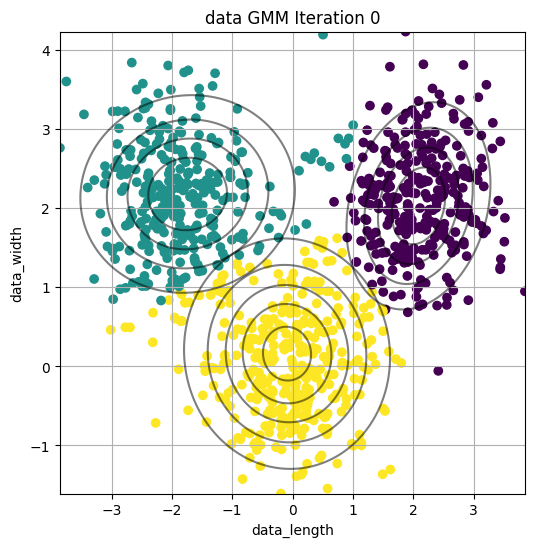

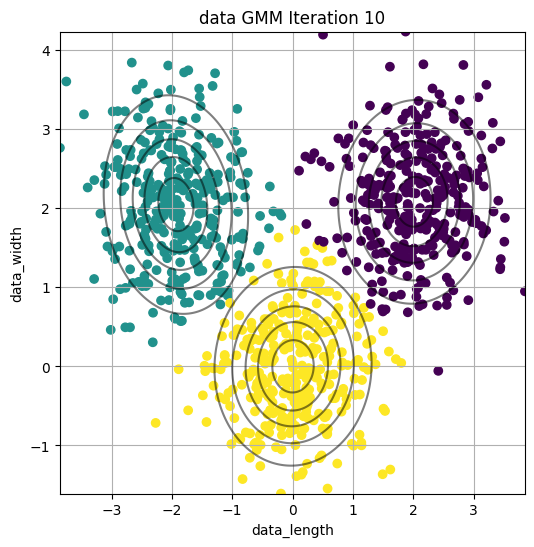

In [145]:
means, covariances, mixing_coeffs, log_likelihoods = custom_gmm_with_plots(X, n_clusters,label="data")

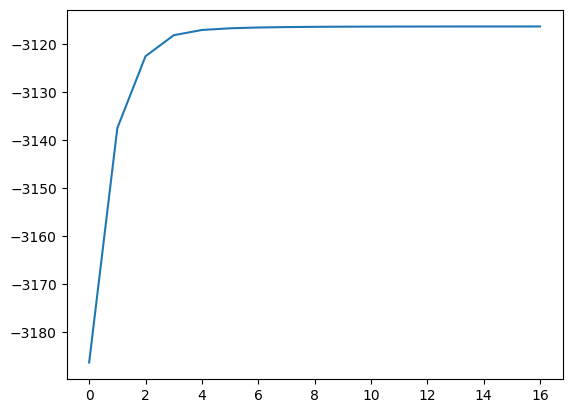

In [146]:
plt.plot(log_likelihoods)

In [148]:
means

array([[ 2.01689324,  2.07896196],
       [-1.92989233,  2.04258814],
       [ 0.00919942, -0.00693793]])

In [149]:
covariances

array([[[ 0.46785383,  0.0199862 ],
        [ 0.0199862 ,  0.487277  ]],

       [[ 0.42196381, -0.05286433],
        [-0.05286433,  0.56191237]],

       [[ 0.48636165,  0.01290086],
        [ 0.01290086,  0.45051737]]])

### TASK-2

In [152]:
df2 = pd.DataFrame(np.array([[-1.5,1.8],[1,1],[-2,-1],[3,3],[0,2.5]]))
df2

,0,1
0,-1.5,1.8
1,1.0,1.0
2,-2.0,-1.0
3,3.0,3.0
4,0.0,2.5


In [153]:
n_clusters = 3
print(expectation_step(df2, means, covariances, mixing_coeffs))

[[2.29202247e-06 9.97134885e-01 2.86282254e-03]
 [4.61242795e-01 1.06185099e-04 5.38651020e-01]
 [8.68992493e-10 3.60928603e-02 9.63907139e-01]
 [9.99999953e-01 2.06973903e-13 4.74829164e-08]
 [5.31838536e-01 4.17178824e-01 5.09826405e-02]]
